Universidade Federal do Rio Grande do Norte (UFRN)

Centro de Ciências Exatas e da Terra (CCET)

Departamento de Física Teórica e Experimental (DFTE)

Grupo de Magnetísmo (GMAG)

Criação: Cleiza Cristiano

Colaboradores: Paulo Albuquerque, Pedro Lucas e Edimilson Félix

Ultima atualização: 13/05/2024


# Plotando curva de histerese para cada ângulo (normalizada)

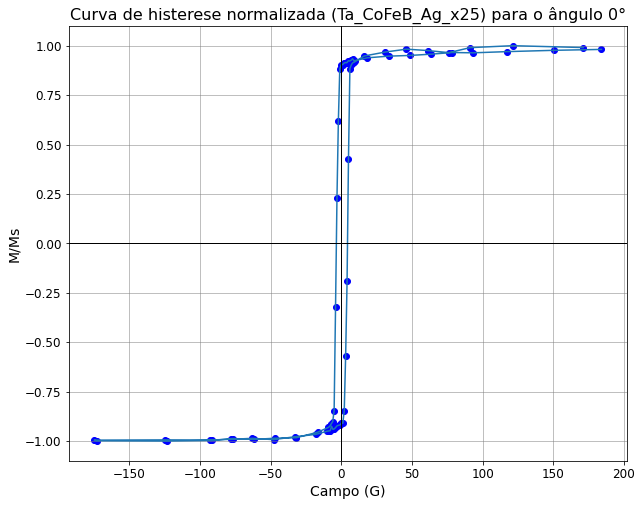

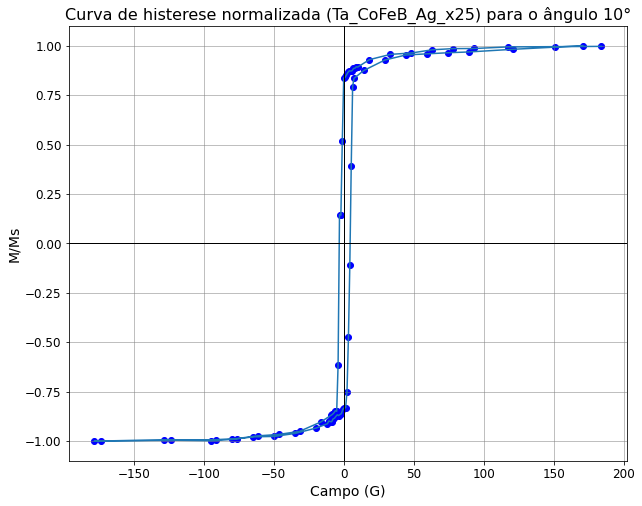

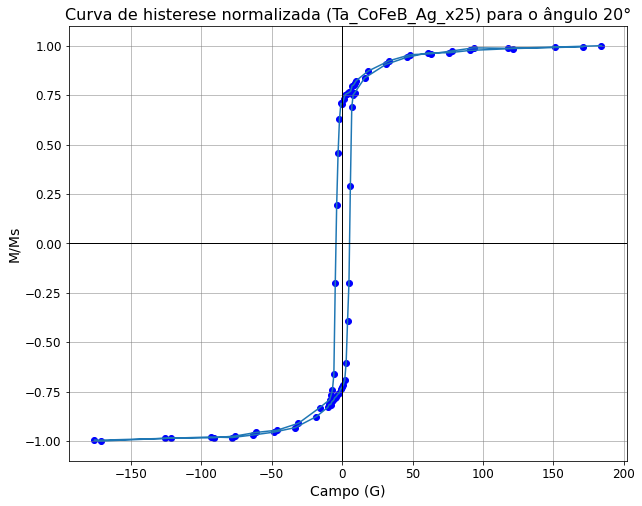

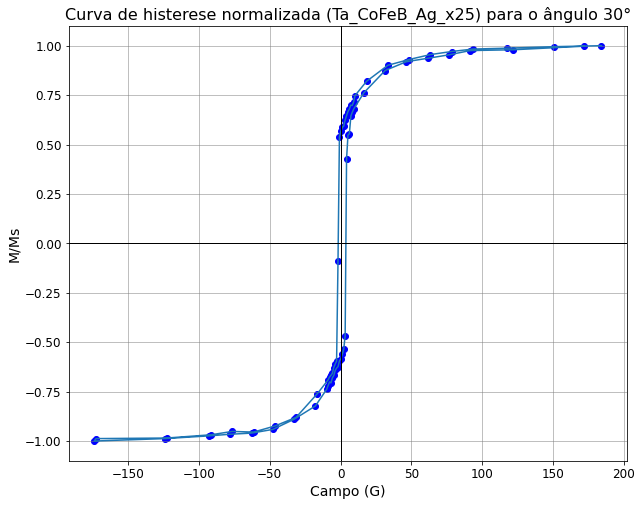

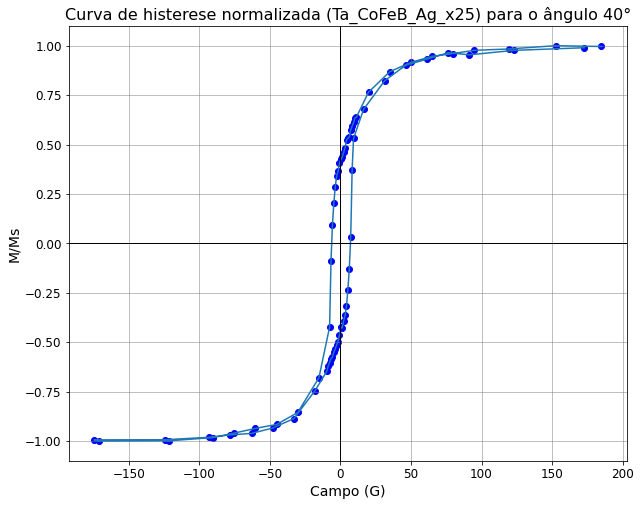

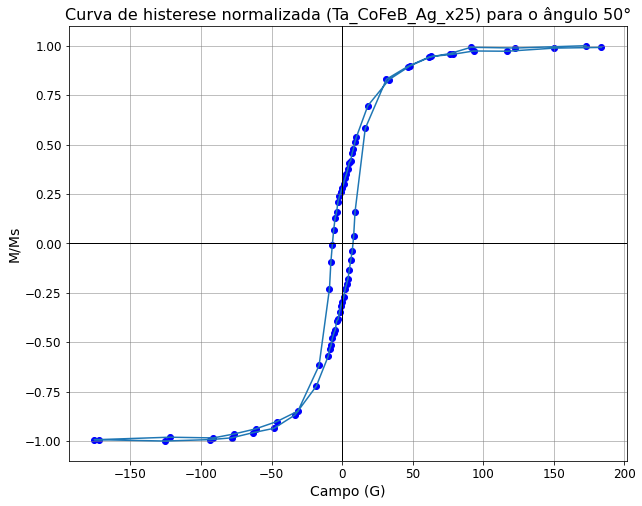

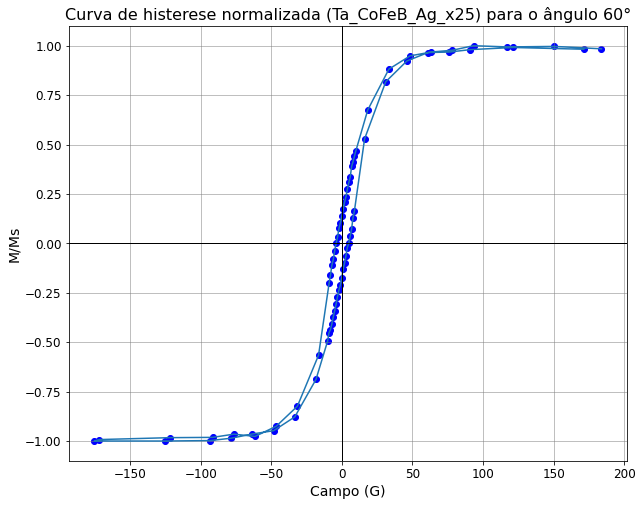

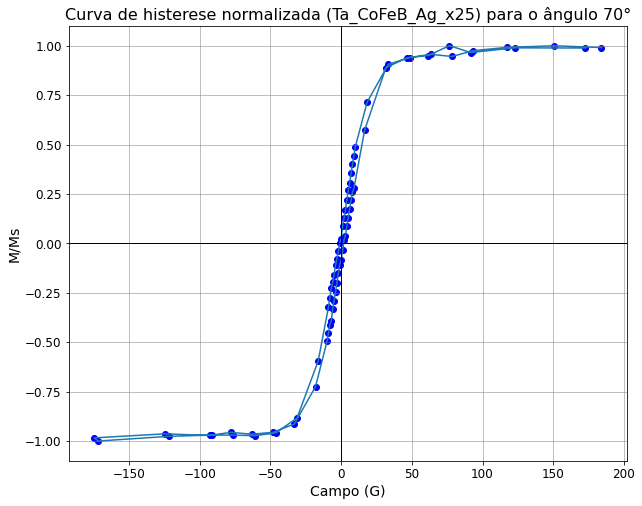

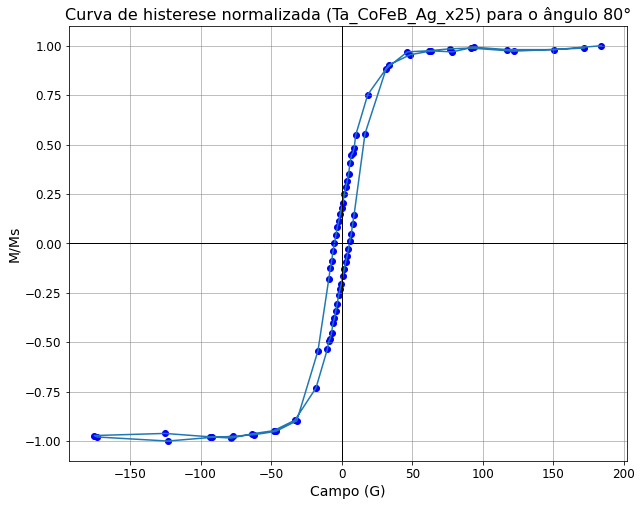

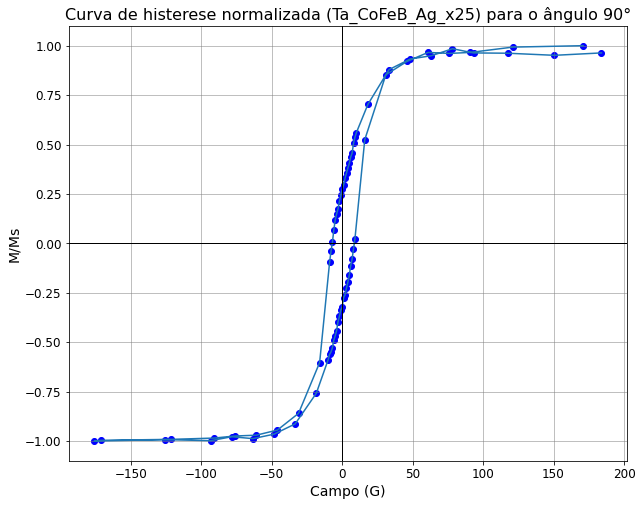

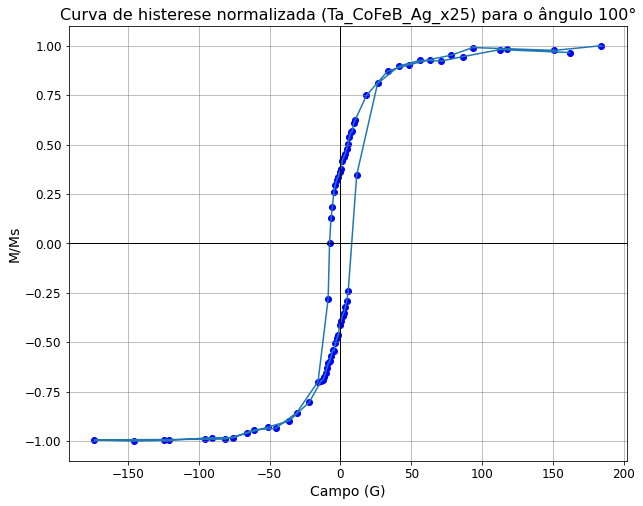

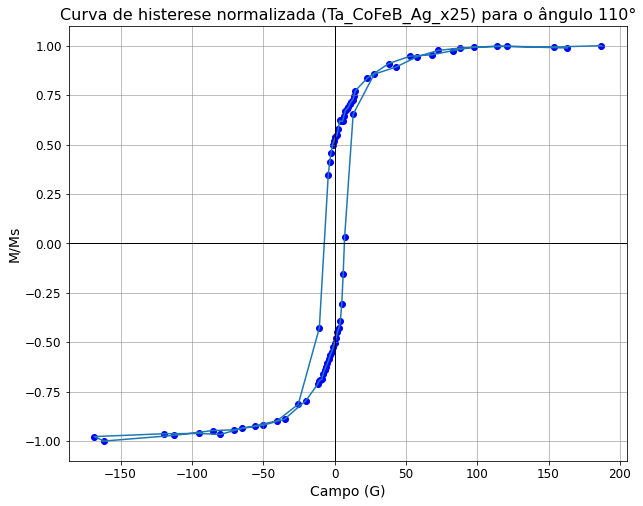

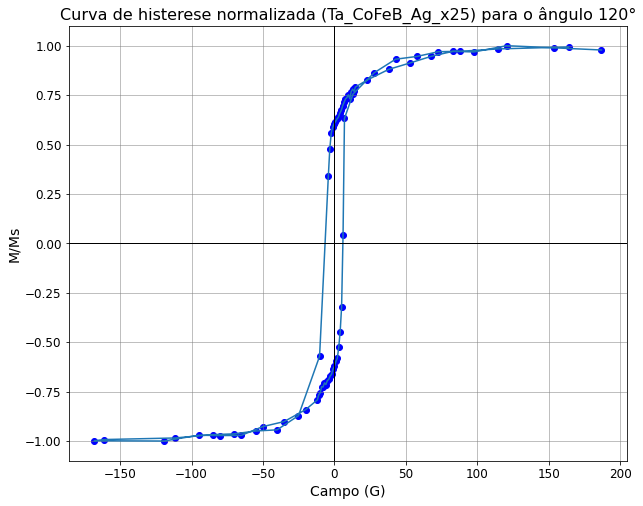

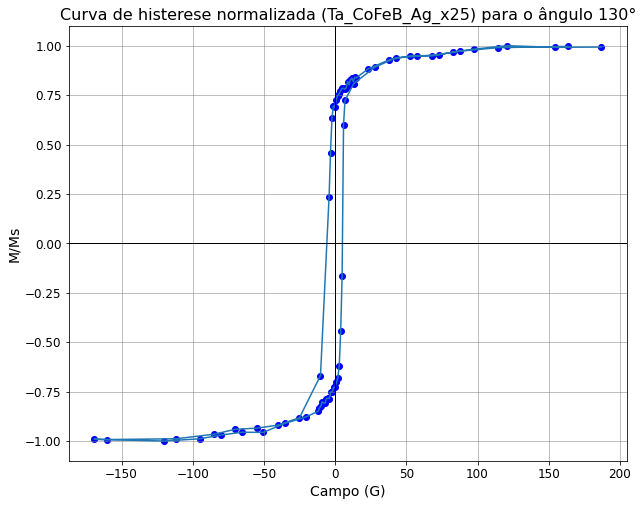

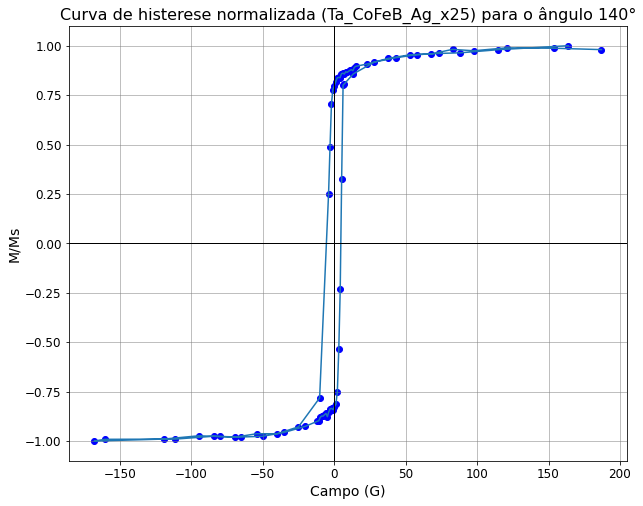

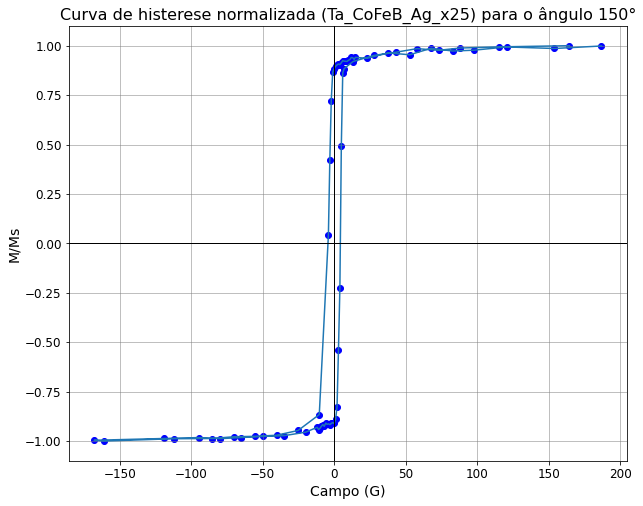

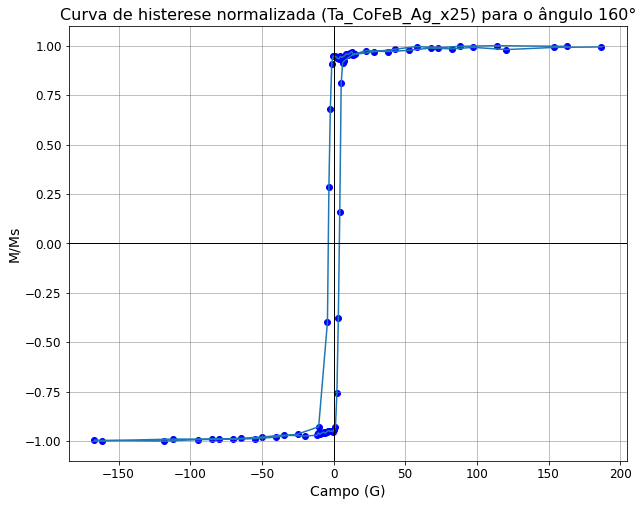

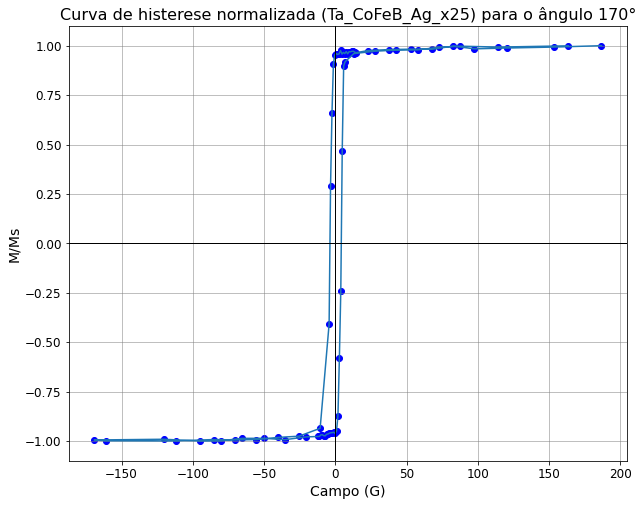

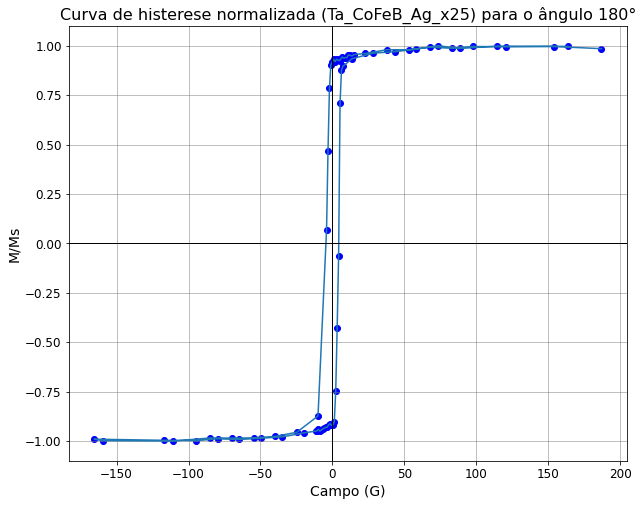

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Caminho para a pasta que contém os arquivos .txt
caminho_pasta = 'C:/Winpython/WPy64-39100/notebooks/IC/CLEIZA/Ta_CoFeB_Ag_x25'

# Lista todos os arquivos na pasta
arquivos = os.listdir(caminho_pasta)

# Filtra apenas os arquivos .txt
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

# Função para extrair o ângulo do nome do arquivo
def extrair_angulo(nome_arquivo):
    partes = nome_arquivo.split('_')
    angulo_str = partes[-1].split('.')[0]
    return int(angulo_str)

# Ordena os arquivos pelo ângulo
arquivos_txt.sort(key=extrair_angulo)

# Itera sobre os arquivos para determinar os limites dos eixos x e y
for arquivo_txt in arquivos_txt:
    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(caminho_pasta, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas
    dados = np.loadtxt(caminho_arquivo, skiprows=12)

    # Extrai os dados de campo e magnetização
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]

# Define o tamanho da figura
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y
fonte_eixos = 14

# Define o tamanho da fonte dos títulos
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y
tamanho_numeros = 12

# Define o tamanho da fonte da legenda
tamanho_legenda = 12

# Itera novamente sobre os arquivos para criar os gráficos
for arquivo_txt in arquivos_txt:
    # Extrai o ângulo do nome do arquivo
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(caminho_pasta, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas
    dados = np.loadtxt(caminho_arquivo, skiprows=12)

    # Extrai os dados de campo e magnetização
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]
    
    # Normalizando o campo e o momento ao dividir pelo limite dos respectivos eixos
    magnetizacaoNormalizada = (2*magnetizacao-((magnetizacao.max()+magnetizacao.min())))/(magnetizacao.max()-magnetizacao.min())

    # Cria uma nova figura com tamanho definido
    plt.figure(figsize=fig_size)
    
    # Plota os pontos
    #plt.scatter(campo, magnetizacao, label='Momento magnético', color='blue')
    
    # Plota os pontos
    plt.scatter((campo), (magnetizacaoNormalizada), color='blue')

    # Plota a linha
    plt.plot(campo, magnetizacaoNormalizada)
    
    # Adiciona linhas de grade
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
    plt.grid(True, which='major', axis='both', color='gray', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=1)  # Linha de grade zero para magnetização
    plt.axvline(0, color='black', linewidth=1)  # Linha de grade zero para campo
    
    # Adiciona título e rótulos com tamanho de fonte personalizado
    plt.xlabel('Campo (G)', fontsize=fonte_eixos)
    plt.ylabel('M/Ms', fontsize=fonte_eixos)
    plt.title(f'Curva de histerese normalizada (Ta_CoFeB_Ag_x25) para o ângulo {angulo}°',fontsize=fonte_titulo)
    
    # Define o tamanho dos números nos eixos x e y
    plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)
    
    # Adiciona legenda com tamanho de fonte personalizado e posição à esquerda
    #plt.legend(fontsize=tamanho_legenda, loc='upper left')
    
    # Exibe o gráfico
    plt.show()